# Estimation 2
## Model Evaluation

### p-p plot

Given a sample of $M$ numerical observations $(x_1, \cdots, x_M$), 

1. Arrange them in increasing order $(x_{(1)} \leq x_{(2)} \leq \cdots x_{(M)})$
2. Approximate the probability of an observation less than or equal to $x_{(i)}$ using the sample data by the sample proportion $p_i = \frac{i}{n+1}$
3. The hypothesised / parametrically estimated probability of an observation less than or equal to $x_{(i)}$ is $F^*(x_{(i)})$.
4. Finally plot the *p-p* plot of $F^*(x_{(i)})$ against $p_i$. If $F^*(\cdot)$ fits the data well, the *p-p* plot should approximately follow the 45$^\circ$ line

### q-q plot

Given a sample of $M$ numerical observations $(x_1, \cdots, x_M$), 

1. Arrange them in increasing order $(x_{(1)} \leq x_{(2)} \leq \cdots x_{(M)})$
2. Approximate the probability of an observation less than or equal to $x_{(i)}$ using the sample data by the sample proportion $p_i = \frac{i}{n+1}$
3. The hypothesised / parametrically estimated probability of an observation less than or equal to $x_{(i)}$ is $F^*(x_{(i)})$.
4. Finally plot the *q-q* plot of $F^{*-1}(x_{(i)})$ against $x_(i)$. If $F^*(\cdot)$ fits the data well, the *q-q* plot should approximately follow the 45$^\circ$ line

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Exercise 13.1
Given $M$ observations `2, 5, 6, 9, 14, 18, 23` and that they follow an exponential distribution, using MLE, the likelihood function is $\prod_{i=1}^M \lambda e ^{-\lambda x_i}$ and the log-likelihood is
$$\begin{align}
\sum_{i=1}^{M} \log (\lambda) - \lambda x_i &= 7 \log(\lambda) - 77\lambda\\
\frac{d}{d\lambda} 7 \log(\lambda) - 77\lambda &= \frac{7}{\lambda} - 77 =0\\
\lambda &= 0.09091
\end{align}$$

In [77]:
samples = [2, 5, 6, 9, 14, 18, 23]
ld = 1/(sum(samples)/len(samples))
print(ld) #value of estimated parameter
sample_as_dict = [{'x' : i} for i in samples]

0.09090909090909091


Computing sample proportion of $i$-th order statistic $p_i = \frac{i}{(M + 1)}$ and using theoretical cumulative frequency $F_X(x) = 1 - e^{-\lambda x}$

        F_i        F_x    p_i   x
0  0.166247   1.468845  0.125   2
1  0.365264   3.164503  0.250   5
2  0.420422   5.170040  0.375   6
3  0.558767   7.624619  0.500   9
4  0.719933  10.789122  0.625  14
5  0.805313  15.249238  0.750  18
6  0.876425  22.873857  0.875  23


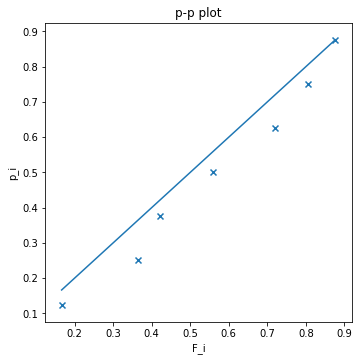

In [84]:
i = 1
for s in sample_as_dict:
    s['p_i'] = (i/(len(samples) + 1))
    s['F_i'] = 1- np.exp(-ld*s['x'])
    s['F_x'] = np.log(1-s['p_i'])/-ld
    i = i + 1
sample_df = pd.DataFrame(sample_as_dict)
print(sample_df)
fig = plt.gcf()
plt.plot(sample_df['F_i'],sample_df['F_i'],zorder=1)
plt.scatter(sample_df['F_i'],sample_df['p_i'],zorder=2, marker='x')
plt.title('p-p plot')
plt.xlabel('F_i')
plt.ylabel('p_i')
fig.set_size_inches(5.5, 5.5)
plt.show()

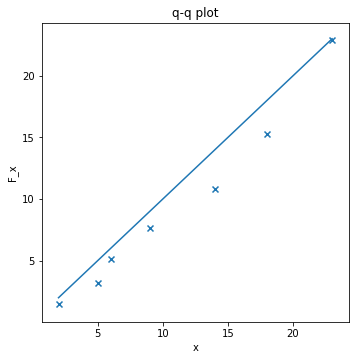

In [86]:
fig = plt.gcf()
plt.plot(sample_df['x'],sample_df['x'],zorder=1)
plt.scatter(sample_df['x'],sample_df['F_x'],zorder=2, marker='x')
plt.title('q-q plot')
plt.xlabel('x')
plt.ylabel('F_x')
fig.set_size_inches(5.5, 5.5)
plt.show()

$\diamond$

**References:**

Nonlife Actuarial Models, Yiu (2009) - Chapter 13